# Download Required Packages

In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [33]:
data = np.genfromtxt('./Houston.csv', delimiter=',', dtype='longlong', encoding='utf-8')
data = np.delete(data, 0, 0)

# Plot Sqft Area vs Price

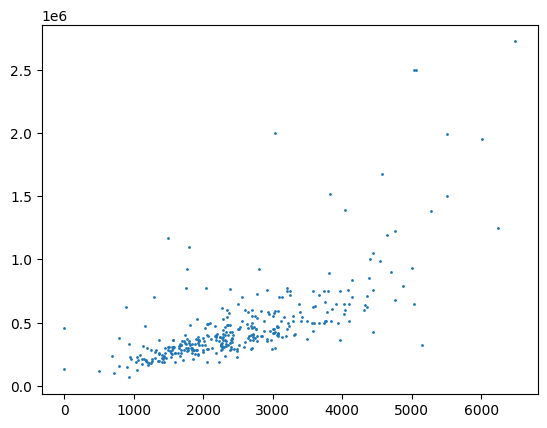

In [34]:
plt.scatter(data[:, 10], data[:, 6], s=1)

# Run 2D Gradient Descent Algo

[0/10]: x0 = 0.014578501184027938 x1=44.48925318939924


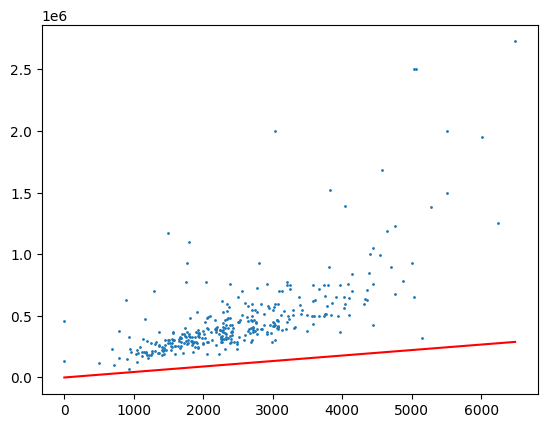

[1/10]: x0 = 0.025711563426270567 x1=78.75200179737365


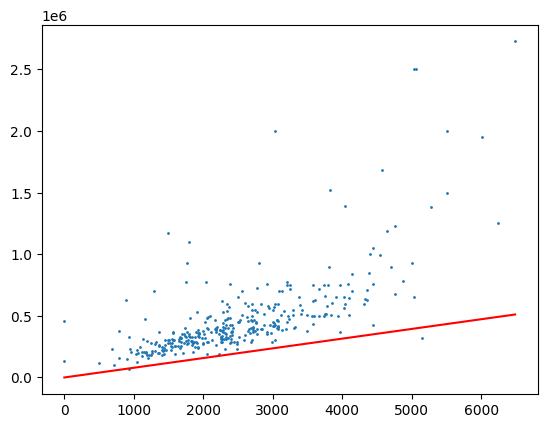

[2/10]: x0 = 0.03419117118880089 x1=105.13895726054477


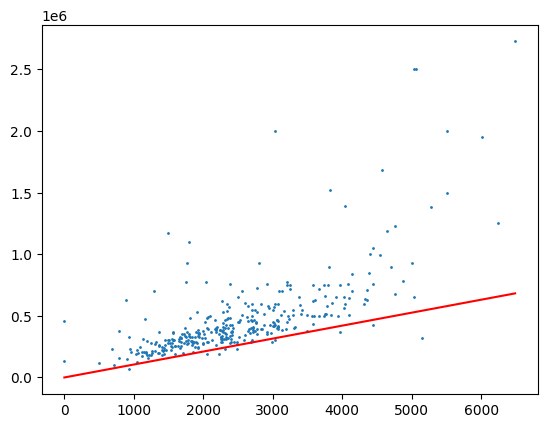

[3/10]: x0 = 0.04062725973811423 x1=125.46048565957511


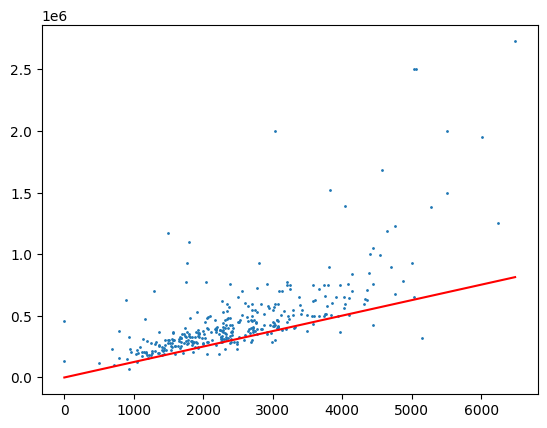

[4/10]: x0 = 0.045489561811568394 x1=141.11081399100553


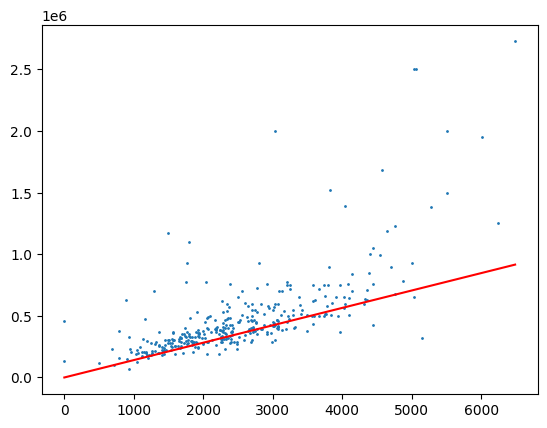

[5/10]: x0 = 0.04913983521637094 x1=153.16368581347035


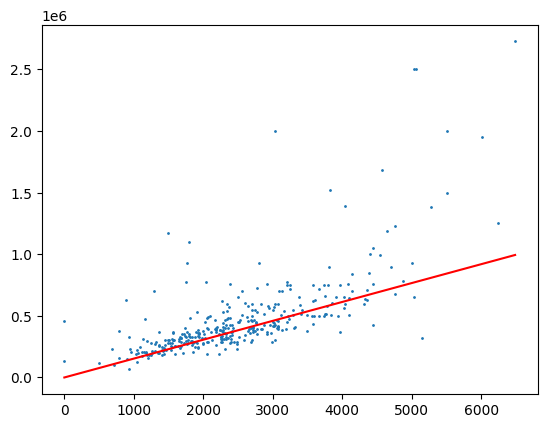

[6/10]: x0 = 0.05185668244425299 x1=162.44602904657765


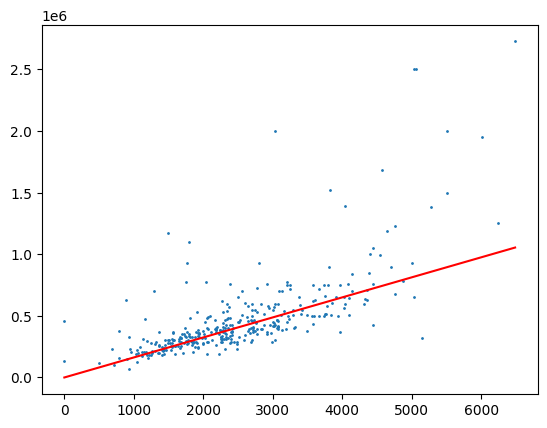

[7/10]: x0 = 0.05385466513521865 x1=169.59469015029146


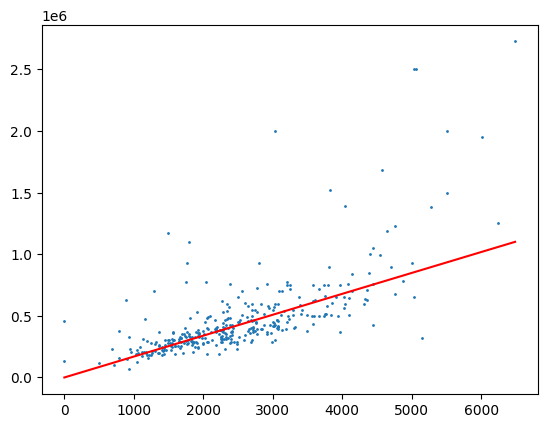

[8/10]: x0 = 0.05529902480263419 x1=175.10012712458067


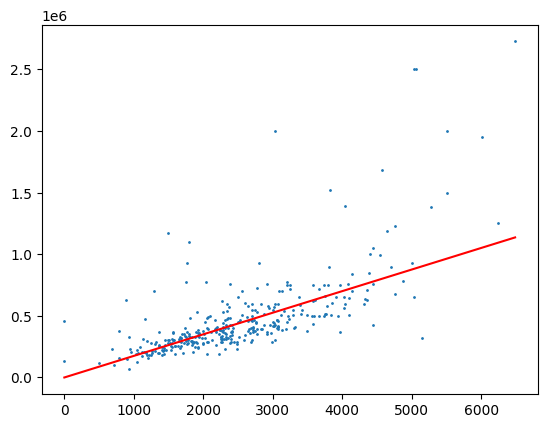

[9/10]: x0 = 0.05631701978465877 x1=179.34005903495972


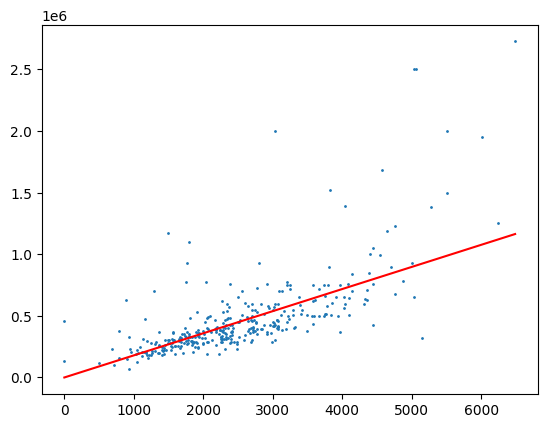

array([[5.63170198e-02],
       [1.79340059e+02]])

In [35]:
placeholder_x = np.arange(np.amax(data[:, 10]))

def sgd(data, training_rate=0.0000000001, iters=10):
    theta = np.array([[0],[0]])
    X = data[:, [10]]
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [6]].T[0]

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, 10], data[:, 6], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


sgd(data)
